<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação 
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### **1.1. Análise exploratória** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

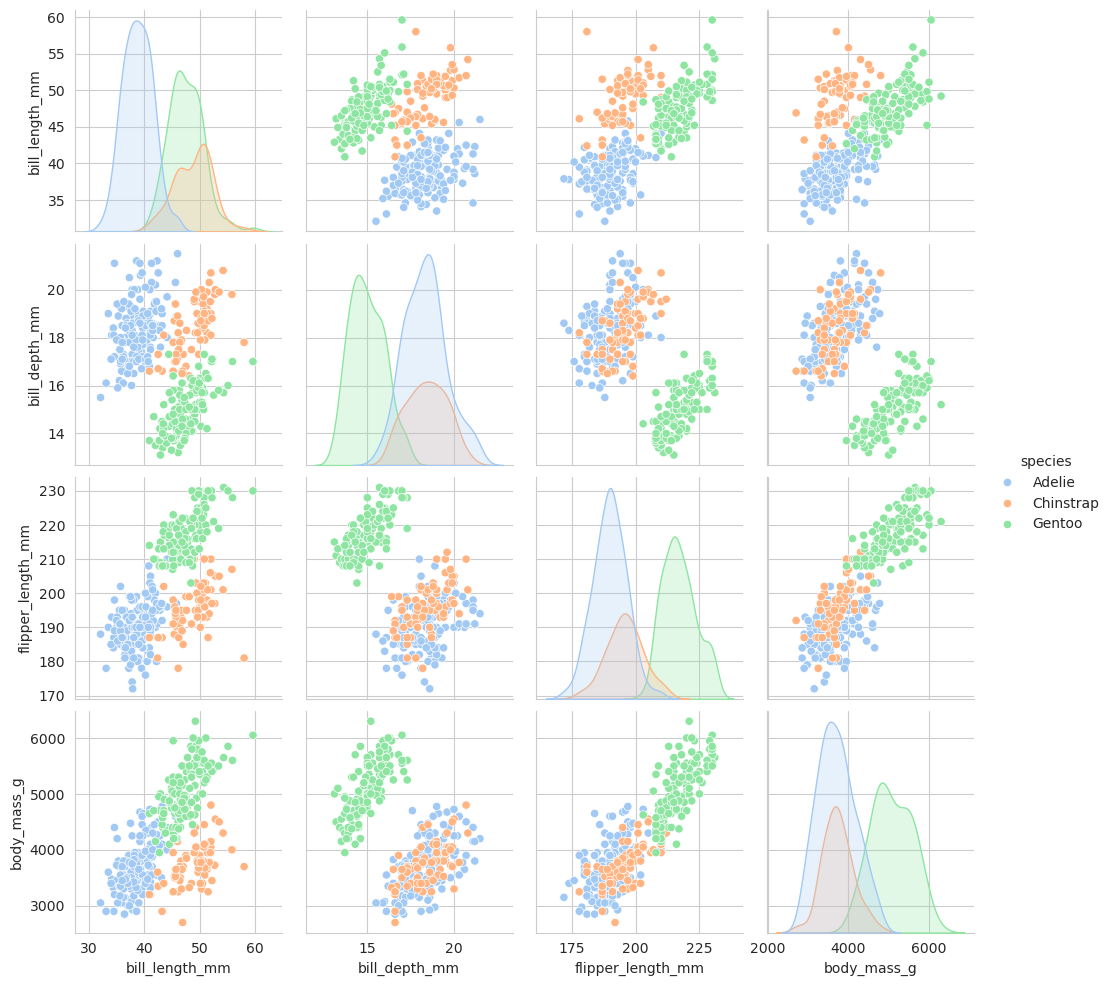

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:** Neste gráfico, percebemos que a espécie Gentoo possui os maiores números médios de massa, assim como maior comprimento de asa e bico, assim como a menor profundidade de bico. A espécie Adelie e Chinstrap compartilham de muitas características, mas diferem no comprimento do bico, onde os Chinstrap possuem números maiores.

 - Sexo por espécie:

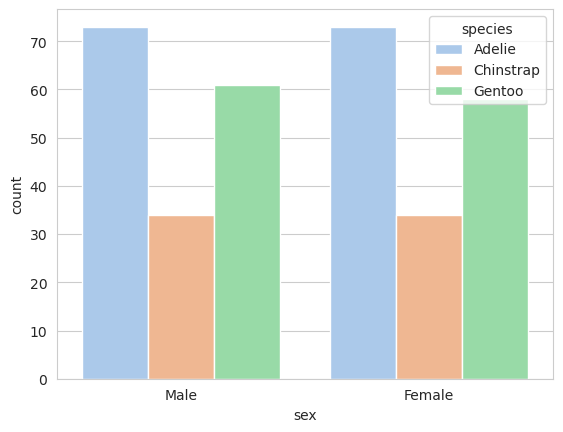

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

**Comentário:** Neste gráfico temos a contagem dos espécimes ordenados por espécie. Nele fica claro que a espécie Chinstrap possui um número de indivíduos bem menor, representando metade da quantidade de indivíduos da espécie Adelie neste conjunto de informações. Os Gentoo são a segunda espécie mais populosa no dataset.

 - Ilha por espécie:

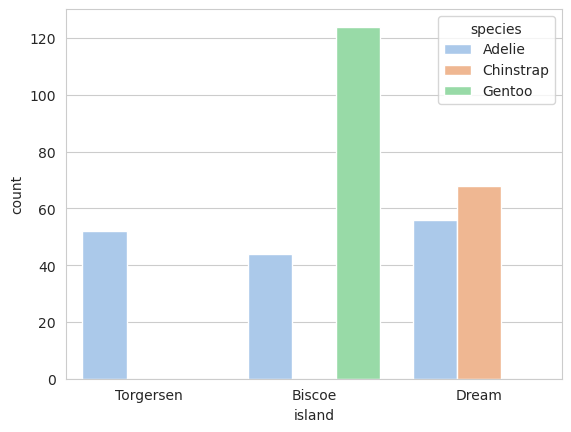

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**Comentário:** Neste gráfico podemos observar a distribuição das espécies por ilha. A espécie Adelie coexistindo em ambas as ilhas, enquanto Gentoo e Chinstrap só aparecem nas ilhas Biscoe e Dream respectivamente. 

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [23]:
# Importei um milhão de coisas pensando que ia usar, no fim não foi necessário, mas mantive pra que eu pudesse ter noção disso quando fosse revisitar
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image
from sklearn import tree


#Carregar dataframe e excluir valores
df = sns.load_dataset('penguins')
df_limpo = df.dropna()
df_limpo.head()



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **2.2. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [37]:
# Identificar as variáveis categóricas
categorical_cols = df_limpo.select_dtypes(include=['object']).columns.drop('species')

# Aplicar a técnica de One-Hot Encoding utilizando o 'dummies' junto da limpeza
for col in categorical_cols:
    dummies = pd.get_dummies(df_limpo[col], prefix=col + '_nom')
    df_limpo = pd.concat([df_limpo, dummies], axis=1)
    df_limpo.drop(columns=[col], inplace=True)

# Conversão dos valores booleanos em 0's e 1's
df_limpo = df_limpo.astype({col: int for col in df_limpo.columns if df_limpo[col].dtype == 'bool'})

df_limpo.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_nom_Biscoe,island_nom_Dream,island_nom_Torgersen,sex_nom_Female,sex_nom_Male
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1,0,1


### **2.3. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [38]:
# Separar treino x teste
X = df_limpo.drop('species', axis=1)
y = df_limpo['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Estabelecer variáveis preditoras
predictors_train, predictors_test, target_train, target_test = train_test_split(
    df_limpo.drop(['species'], axis=1), 
    df_limpo['species'], 
    test_size=0.33, 
    random_state=123
)

## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** Folhas são aqueles que não dividem mais a informação, logo seriam 11.

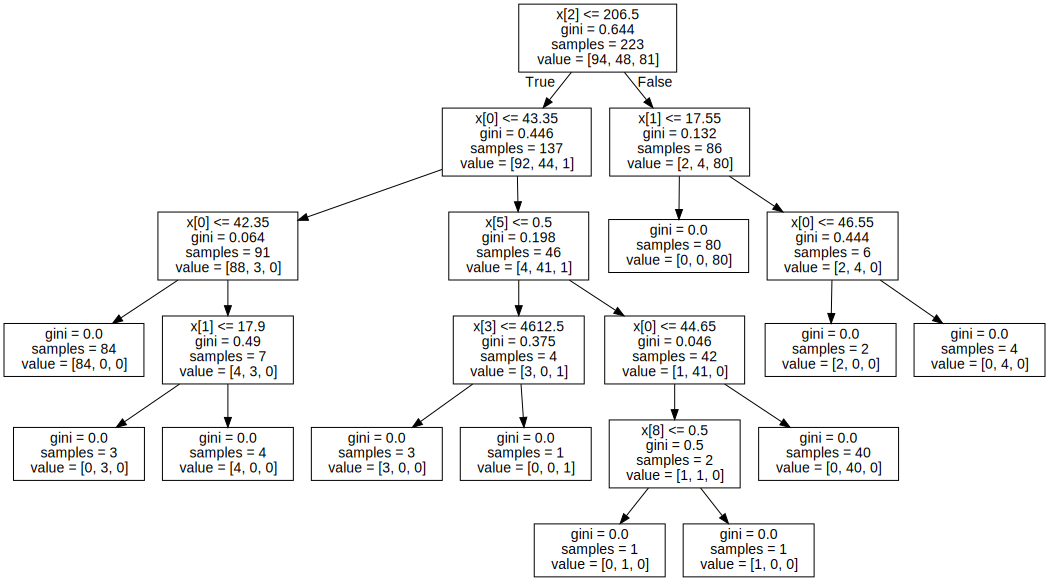

In [39]:

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Treinar modelo de árvore e apresentar em gráfico
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

tree_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(tree_data) 
graph

In [40]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 42,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
        'body_mass_g', 'island_nom_Biscoe', 'island_nom_Dream',
        'island_nom_Torgersen', 'sex_nom_Female', 'sex_nom_Male'],
       dtype=object),
 'n_features_in_': 9,
 'n_outputs_': 1,
 'classes_': array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 'n_classes_': 3,
 'max_features_': 9,
 'tree_': <sklearn.tree._tree.Tree at 0x70052241abf0>}

### **3.2. Avaliação** 

**a.** Matriz de Confusão 

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:** Através do cálculo da diagonal principal, temos 46+30+33= 109. Temos então 109/110 acertos. Bons dados para seguir com o cálculo de acurácia.

[[46  1  0]
 [ 0 30  0]
 [ 0  0 33]]


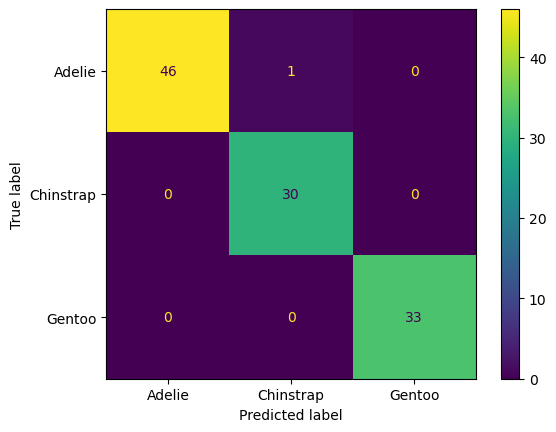

In [51]:
# Ao importar as bibliotecas, descobri que o ConfusionMatrixDisplay é o novo caminho. 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

target_predicted = model.predict(predictors_test)

# Apresentar os dados da matriz de confusão tanto em gráfico quanto em lista
confusion_matrix = confusion_matrix(target_test, target_predicted)
print(confusion_matrix)

ConfusionMatrixDisplay.from_estimator(model, predictors_test, target_test)
plt.show()

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [53]:
# Ordenando em array para facilitar minha visualização
confusion_matrix = np.array([[46, 1, 0],
                                [0, 30, 0],
                                [0, 0, 33]])

# Soma dos valores da diagonal principal (número total de acertos)
correct_classifications = np.trace(confusion_matrix)
total_predictions = confusion_matrix.sum()

# Cálculo da acurácia
accuracy = correct_classifications / total_predictions
print(f'Acurácia: {accuracy:.2f}')


Acurácia: 0.99


## 4\. Predição  

### **4.1. Novo penguim** 

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [54]:
# Apresentação do cabeçalho de modo a facilitar a ordenação manual da array seguinte
df_limpo.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_nom_Biscoe,island_nom_Dream,island_nom_Torgersen,sex_nom_Female,sex_nom_Male
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1,0,1


In [62]:
# Organização da array com os dados novos, bem como utilização do modelo treinado para predição da espécie
new_p = np.array([38.2, 18.1, 185.0, 3950.0, 1, 0, 0, 0, 1])

# Predição junto da apresentação do primeiro valor da array, acessado pelo indice 0
specie = model.predict(new_p.reshape(1, -1))
predicted_species = specie[0]
print(f'A espécie predita é {predicted_species}')


A espécie predita é Adelie


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


---